<a href="https://colab.research.google.com/github/ykitaguchi77/GO_AI_project/blob/main/Comparing_Pytorch_and_CoreML_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparing Pytorch and CoreML results**

In [54]:
#google driveをcolabolatoryにマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)



def openCSV(csv_path):
    df = pd.read_csv(csv_path, encoding="utf-8")
    #df = df.drop(df.columns[[0]], axis=1) #1列目を削除する
    #print(df)
    return df

csv_path = "/content/drive/MyDrive/Deep_learning/GO_extended_dataset/gravcont_newPatient_mobileNetv3_20221025.csv"
df = openCSV(csv_path)
df

,path,label,pred,Pytorch_prob,iPhone11_pred,iPhone11_prob_1,iPhone11_prob_2,iPhone11_prob_3,iPhone11_prob_average
0,slide1.jpeg,1,1,0.623,1,0.5629,0.6152,0.7340,0.637367
1,slide2.jpeg,1,0,0.388,1,0.2983,0.4584,0.5258,0.427500
2,slide3.jpeg,1,1,0.936,1,0.8999,0.8294,0.8296,0.852967
3,slide4.jpeg,1,1,0.966,1,0.9362,0.6919,0.8540,0.827367
4,slide5.jpeg,1,1,0.838,1,0.8528,0.8248,0.7608,0.812800
5,slide6.jpeg,1,1,0.960,1,0.6390,0.6314,0.6948,0.655067
6,slide7.jpeg,1,1,0.806,1,0.5126,0.5400,0.5879,0.546833
7,slide8.jpeg,1,1,0.853,1,0.8903,0.9312,0.9214,0.914300
8,slide9.jpeg,1,1,0.964,1,0.6897,0.6699,0.8179,0.725833
9,slide10.jpeg,1,1,0.982,1,0.9773,0.9289,0.9598,0.955333


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import statistics


def specificity_score(label, pred):
    tn, fp, fn, tp = confusion_matrix(label, pred).flatten()
    return tn / (tn + fp)


accuracy_list, precision_list, recall_list, specificity_list, f1_score_list, area_u_ROC = [], [], [], [], [], []
pred = ["pred", "iPhone11_pred"]
prob = ["Pytorch_prob", "iPhone11_prob_average"]
for pred, prob in zip(pred, prob):
    Y_test = df["label"]
    Y_pred = df[pred]
    Y_prob = df[prob]

    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    #print(tp, fn, fp, tn)

    print(f"grader: {grader}")
    print('confusion matrix = \n', confusion_matrix(Y_test, Y_pred))
    print(f'Accuracy : {accuracy_score(Y_test, Y_pred)}')
    print(f'Precision (true positive rate) : {precision_score(Y_test, Y_pred)}')
    print(f'Recall (sensitivity): {recall_score(Y_test, Y_pred)}')
    print(f'Specificity : {specificity_score(Y_test, Y_pred)}')
    print(f'F1 score : {f1_score(Y_test, Y_pred)}')
    print("")

    #ROC curve
    fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)     
    plt.plot(fpr, tpr, marker='o')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid()
    print(f'Area_under_ROC : {roc_auc_score(Y_test, Y_prob)}')
    #plt.savefig('plots/roc_curve.png')

    print("")

    accuracy_list.append(accuracy_score(Y_test, Y_pred))
    precision_list.append(precision_score(Y_test, Y_pred))
    recall_list.append(recall_score(Y_test, Y_pred))
    specificity_list.append(specificity_score(Y_test, Y_pred))
    f1_score_list.append(f1_score(Y_test, Y_pred))
    area_u_ROC.append(roc_auc_score(Y_test, Y_prob))


print("Average")
print(f"Accuracy: {statistics.mean(accuracy_list)}±{statistics.stdev(accuracy_list)}")
print(f"Precision: {statistics.mean(precision_list)}±{statistics.stdev(precision_list)}")
print(f"Recall: {statistics.mean(recall_list)}±{statistics.stdev(recall_list)}")
print(f"Specificity: {statistics.mean(specificity_list)}±{statistics.stdev(specificity_list)}")
print(f"f1_score: {statistics.mean(f1_score_list)}±{statistics.stdev(f1_score_list)}")
print("area_u_ROC: ", statistics.mean(area_u_ROC))



In [61]:
import numpy as np

Y_test = df["pred"]
Y_pred = df["iPhone11_pred"]    

tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
#print(tp, fn, fp, tn)

print(f"grader: {grader}")
print('confusion matrix = \n', confusion_matrix(Y_test, Y_pred))
print(f'Accuracy : {accuracy_score(Y_test, Y_pred)}')
print(f'Precision (true positive rate) : {precision_score(Y_test, Y_pred)}')
print(f'Recall (sensitivity): {recall_score(Y_test, Y_pred)}')
print(f'Specificity : {specificity_score(Y_test, Y_pred)}')
print(f'F1 score : {f1_score(Y_test, Y_pred)}')
print("")

#correlation coefficient
coef = np.corrcoef(df["Pytorch_prob"], df["iPhone11_prob_average"])
print(coef)


grader: iPhone11_pred
confusion matrix = 
 [[43  2]
 [10 37]]
Accuracy : 0.8695652173913043
Precision (true positive rate) : 0.9487179487179487
Recall (sensitivity): 0.7872340425531915
Specificity : 0.9555555555555556
F1 score : 0.8604651162790696

[[1.         0.88539935]
 [0.88539935 1.        ]]


In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# グラフ可視化
plt.scatter(
            df["Pytorch_prob"],          # X軸値
            df["iPhone11_prob_average"],    # Y軸値
            marker = "o",           # マーカー形状
            s = 50,                # プロットサイズ
            c = "black",             # カラー
            edgecolor = "",    # 枠線カラー
            linewidth = 3,          # 線の太さ
            alpha = 0.4,            # 透明度
            )

# 書式設定
plt.xlabel("Pytorch_prob")               # X軸ラベル
plt.ylabel("CoreML_prob")        # Y軸ラベル
plt.show()

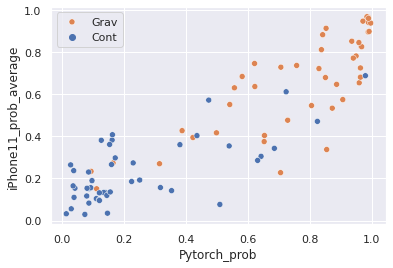

<Figure size 1440x1440 with 0 Axes>

In [ ]:
sns.set(style='darkgrid')
sns.scatterplot(data=df, x=df["Pytorch_prob"], y=df["iPhone11_prob_average"], hue="label")
plt.legend(labels=["Grav","Cont"])
plt.figure(figsize=(20, 20))
fig.set_xlabel("Pytorch_prob", fontsize = 20)
fig.set_ylabel("CoreML_prob", fontsize = 20)

plt.savefig('/content/filename.png')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


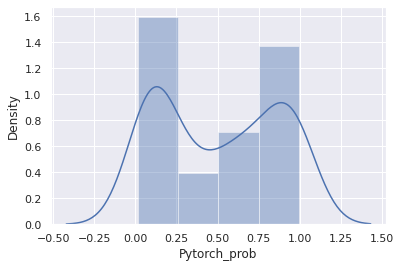

In [ ]:
sns.distplot(df['Pytorch_prob'])
plt.savefig('/content/filename.png')

